In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Luminari"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


In [3]:
logo = plt.imread('../../Branding/light_logo_1.png')


In [4]:
country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")

In [5]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp")])

In [6]:
middle_east = country_shapefiles.loc[country_shapefiles['SOVEREIGNT'].isin(['Iran', 'Iraq', 'Saudi Arabia', 'Syria',
                                                                            'Yemen', 'Oman', 'Israel', 'Turkmenistan',
                                                                            'Uzbekistan', 'Kazakhstan', 'Pakistan',
                                                                            'Afghanistan', 'Jordan', 'United Arab Emirates',
                                                                            'Kyrgyzstan', 'Tajikistan', 'Egypt'])]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Luminari


<AxesSubplot:>

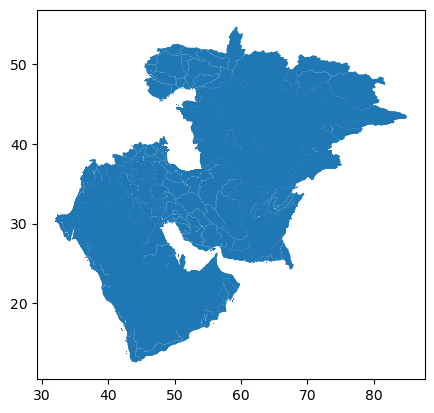

In [7]:
me_basins = gpd.sjoin(basins, middle_east, predicate="intersects")
me_basins.plot()

In [8]:
basins = basins.loc[~basins.SUB_NAME.isin(me_basins.SUB_NAME.tolist())]

In [9]:
#basins = basins.loc[~basins['MAJ_NAME'].isin(['Iceland', 'Arctic Ocean Islands'])]

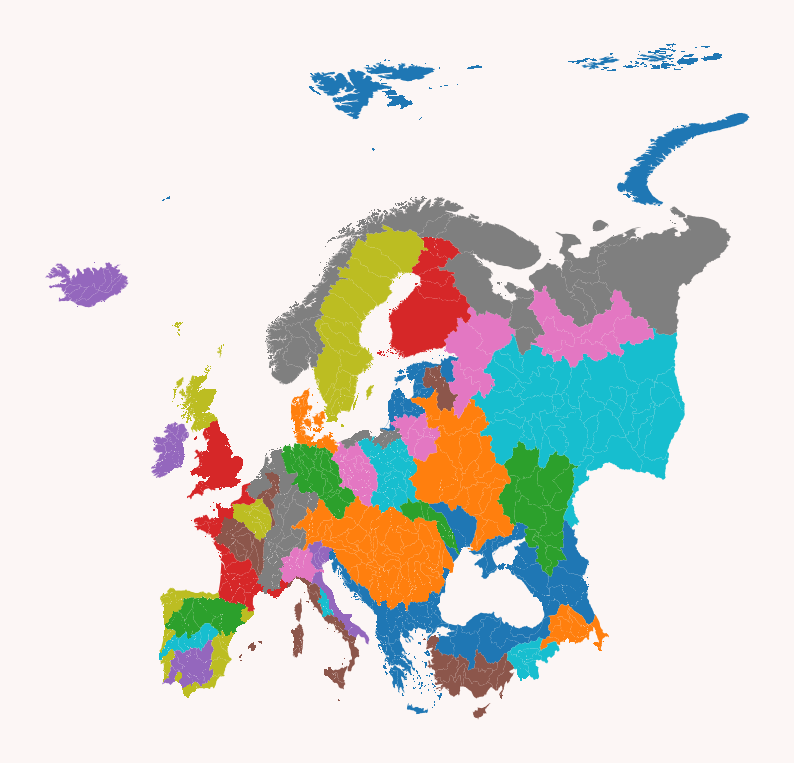

In [10]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 10)

basins.plot(ax=ax, column="MAJ_NAME")

ax.axis('off')
plt.show()

In [11]:
import pandas as pd
import random

colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  'green', '#1e90ff', '#db7093', 'black', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange','red', 'blue', '#808000', '#483d8b', 
                  '#008856',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', 
                  '#dc143c', 
                  'blue', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange', 'black', 'blue', '#808000', 'blue', '#808000']

#random.shuffle(colours_i_like)
print(colours_i_like)
print(basins.MAJ_NAME.unique().tolist())

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

res = {}
for value, key in zip(colours_i_like, basins.MAJ_NAME.unique().tolist()):
    res[key] = value
    
print(res)

['black', 'blue', '#808000', '#483d8b', '#dc143c', '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff', 'green', '#1e90ff', '#db7093', 'black', 'darkgreen', '#ee82ee', '#A1CAF1', 'orange', 'red', 'blue', '#808000', '#483d8b', '#008856', '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#dc143c', 'blue', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff', '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', '#ee82ee', '#A1CAF1', 'orange', 'black', 'blue', '#808000', 'blue', '#808000']
['Spain - Portugal, Atlantic Coast', 'Douro', 'Tagus', 'Guadiana', 'Spain, South and East Coast', 'Guadalquivir', 'Ebro', 'Gironde', 'France, West Coast', 'Loire', 'Seine', 'Rhône', 'France, South Coast', 'England and Wales', 'Ireland', 'Scotland', 'Scheldt', 'Rhine', 'Maas', 'Ems - Weser', 'Po', 'Italy, West Coast', 'Mediterranean Sea Islands', 'Tiber', 'Italy, East Coast', 'Danube', 'Elbe', 'Sweden', 'Wisla', 'Oder', 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Luminari
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Luminari


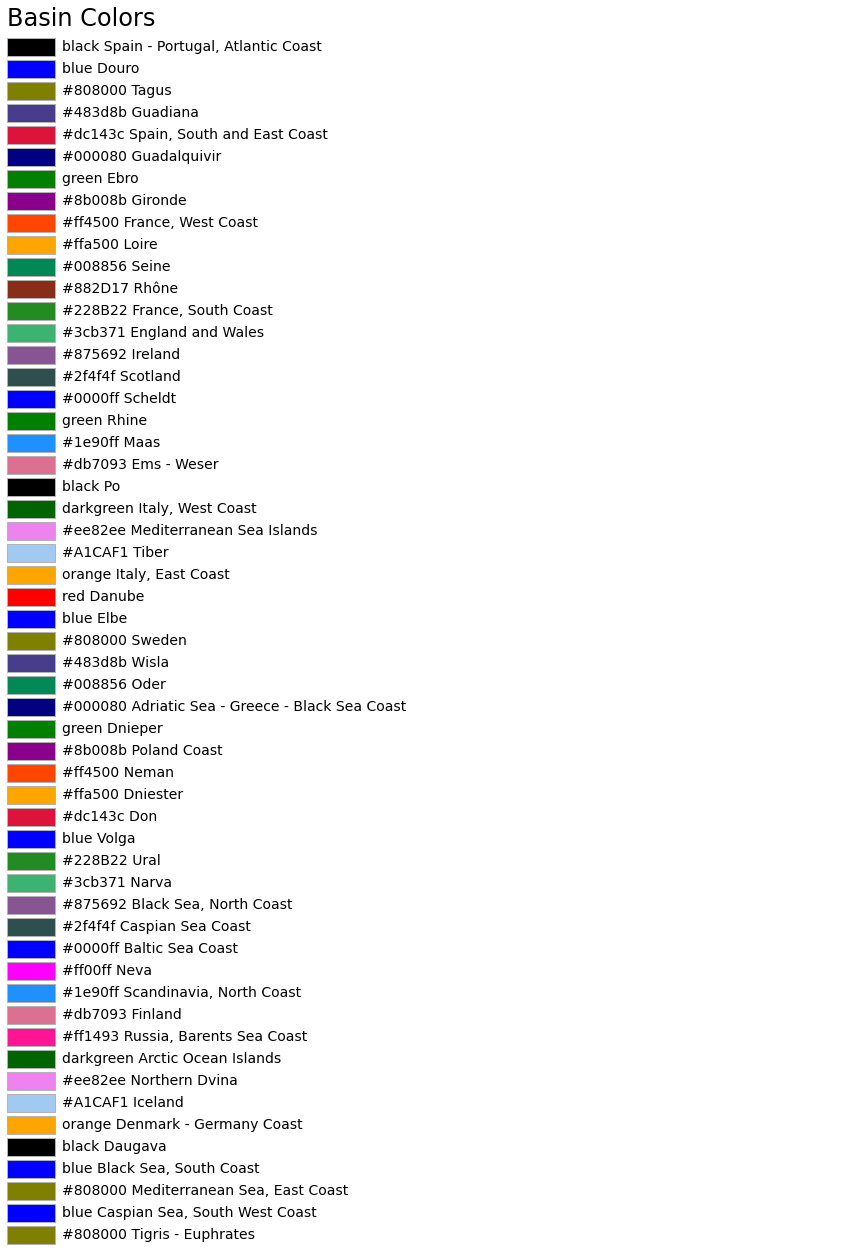

In [12]:
cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


In [13]:
from shapely.ops import unary_union

x = unary_union(basins.geometry.tolist())
y = x.boundary
europe_boundary = gpd.GeoDataFrame(pd.DataFrame({'name': ['europe']}), crs="EPSG:4326", geometry=[y])

In [14]:
print(europe_boundary)

     name                                           geometry
0  europe  MULTILINESTRING ((-8.92083 37.01250, -8.92083 ...


C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


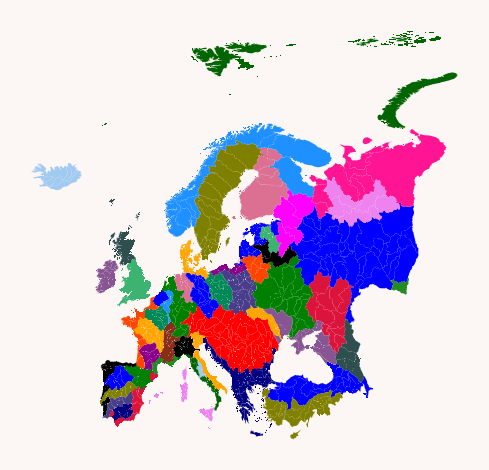

In [15]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/eu3.png", dpi=600, bbox_inches='tight')

In [16]:
eu_rivers = gpd.read_file("../../Nature/rivers/data/rivers/europe/a00000009.gdbtable")

In [17]:
eu_rivers = eu_rivers.loc[eu_rivers['ORD_FLOW'] < 8]

In [18]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

In [19]:
eu_lakes = gpd.sjoin(lakes, basins, op='intersects')
eu_lakes = lakes.loc[lakes.index.isin(eu_lakes.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [20]:
excluded_rivers = gpd.sjoin(eu_rivers, eu_lakes, op='within')
eu_rivers = eu_rivers.loc[~eu_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
rivers_basins = gpd.sjoin(eu_rivers, basins, op="intersects")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


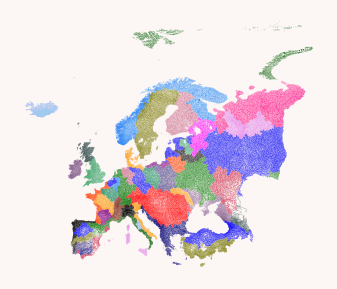

In [22]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=0.1)
eu_lakes.plot(ax=ax, color='#FCF6F5FF')


ax.axis('off')
plt.savefig("outputs/eu4.png", dpi=600, bbox_inches='tight')
plt.show()

In [23]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.02, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)

In [24]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [25]:
logo = plt.imread('../../Branding/light_logo_1.png')

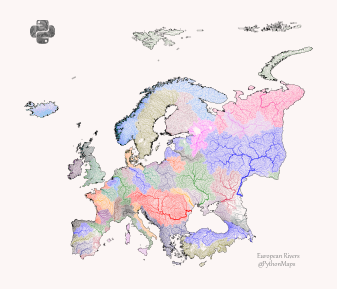

In [32]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
europe_boundary.plot(ax=ax, color="black", lw=0.1)
rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
eu_lakes.plot(ax=ax, color='#FCF6F5FF')
ax.axis('off')
newax = fig.add_axes([0.28, 0.78, 0.07, 0.07], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.78, 0.05, "European Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)
plt.savefig("outputs/eu_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

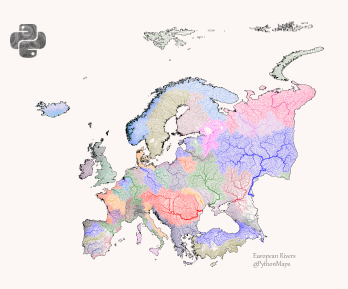

In [27]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
europe_boundary.plot(ax=ax, color="black", lw=0.1)
rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
eu_lakes.plot(ax=ax, color='#FCF6F5FF')
ax.axis('off')
newax = fig.add_axes([0.22, 0.74, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.73, 0.05, "European Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)
plt.savefig("outputs/eu5.png", dpi=600, bbox_inches='tight')
plt.show()

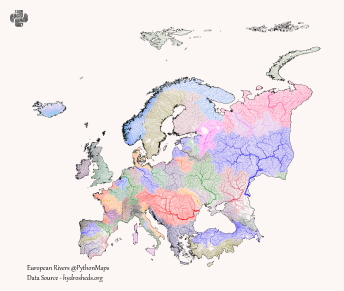

In [28]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
europe_boundary.plot(ax=ax, color="black", lw=0.1)
rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
eu_lakes.plot(ax=ax, color='#FCF6F5FF')
ax.axis('off')
newax = fig.add_axes([0.25, 0.83, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.03, 0.0, "European Rivers @PythonMaps\nData Source - hydrosheds.org",
              size=6,
              color='black',
              transform = ax.transAxes)
plt.savefig("outputs/euvc.png", dpi=1000, bbox_inches='tight')
plt.show()